# Standard Scaler
The StandardScaler is a preprocessing technique used in machine learning to standardize features by removing the mean and scaling them to unit variance. This preprocessing step is essential, especially for algorithms that are sensitive to feature scaling, such as support vector machines, k-nearest neighbors, and logistic regression.

In [41]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler,MinMaxScaler,MaxAbsScaler,RobustScaler

In [42]:
df={'age':[12,14,15,16,18],'height':[12,11,15,5,10],'weight':[55,77,82,24,87]}
df=pd.DataFrame(df)
df.head()

,age,height,weight
0,12,12,55
1,14,11,77
2,15,15,82
3,16,5,24
4,18,10,87


In [43]:
standar_scaler=StandardScaler()
scaled_df=standar_scaler.fit_transform(df)

scaled_df=pd.DataFrame(scaled_df)
scaled_df.head()

,0,1,2
0,-1.5,0.429198,-0.430491
1,-0.5,0.122628,0.516589
2,0.0,1.348907,0.731835
3,0.5,-1.716790,-1.765013
4,1.5,-0.183942,0.947080


# min-max scaler
- ranges from 0-1

In [44]:
standar_scaler=MinMaxScaler()
scaled_df=standar_scaler.fit_transform(df)

scaled_df=pd.DataFrame(scaled_df)
scaled_df.head()

,0,1,2
0,0.000000,0.7,0.492063
1,0.333333,0.6,0.841270
2,0.500000,1.0,0.920635
3,0.666667,0.0,0.000000
4,1.000000,0.5,1.000000


# MaxAbs Scaler

In [45]:
standar_scaler=MaxAbsScaler()
scaled_df=standar_scaler.fit_transform(df)

scaled_df=pd.DataFrame(scaled_df)
scaled_df.head()

,0,1,2
0,0.666667,0.800000,0.632184
1,0.777778,0.733333,0.885057
2,0.833333,1.000000,0.942529
3,0.888889,0.333333,0.275862
4,1.000000,0.666667,1.000000


# Robust Scaler

In [46]:
standar_scaler=RobustScaler()
scaled_df=standar_scaler.fit_transform(df)

scaled_df=pd.DataFrame(scaled_df)
scaled_df.head()

,0,1,2
0,-1.5,0.5,-0.814815
1,-0.5,0.0,0.000000
2,0.0,2.0,0.185185
3,0.5,-3.0,-1.962963
4,1.5,-0.5,0.370370


---
# Transformation

In [47]:
# generate non-normal data (exponential distribution)

np.random.seed(0)
df=np.random.exponential(size=1000,scale=2)
df=pd.DataFrame(df,columns=['values'])
df.head()

,values
0,1.591749
1,2.511862
2,1.846446
3,1.574402
4,1.102097


<Axes: ylabel='Count'>

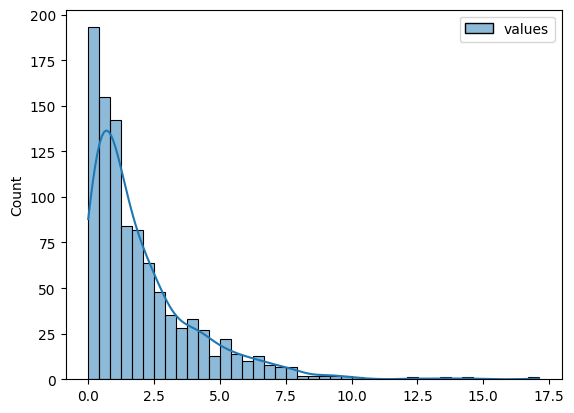

In [48]:
sns.histplot(df,kde=True)

In [49]:
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import QuantileTransformer

In [50]:
pt_boxcox=PowerTransformer(method='box-cox')
pt_yeo_johnson=PowerTransformer(method='yeo-johnson')
qt_normal=QuantileTransformer(output_distribution='normal')
# box_cox k liye data must be positive
df['box-cox']=pt_boxcox.fit_transform(df[['values']]+1)
df['yeo_johnson']=pt_yeo_johnson.fit_transform(df[['values']])
df['quantile']=qt_normal.fit_transform(df[['values']])

In [51]:
df.head()

,values,box-cox,yeo_johnson,quantile
0,1.591749,0.179335,0.179335,0.162552
1,2.511862,0.677331,0.677331,0.587964
2,1.846446,0.339698,0.339698,0.286135
3,1.574402,0.167607,0.167607,0.157469
4,1.102097,-0.202107,-0.202107,-0.154930


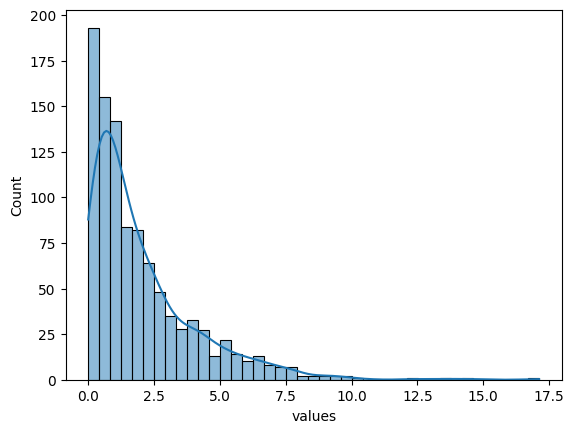

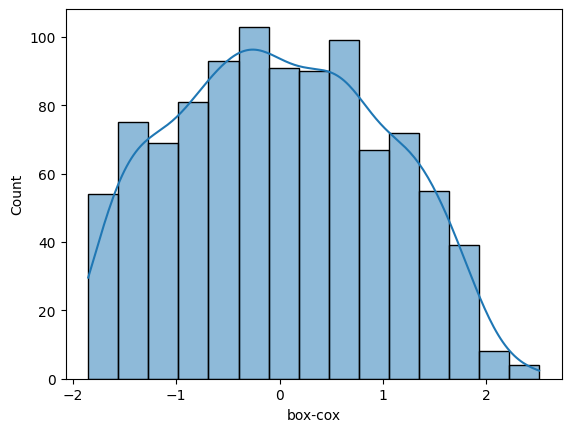

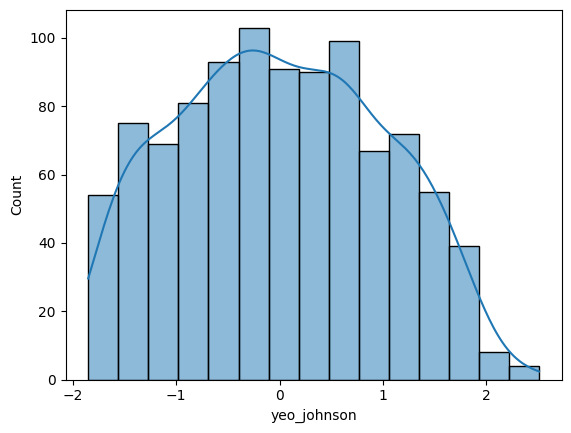

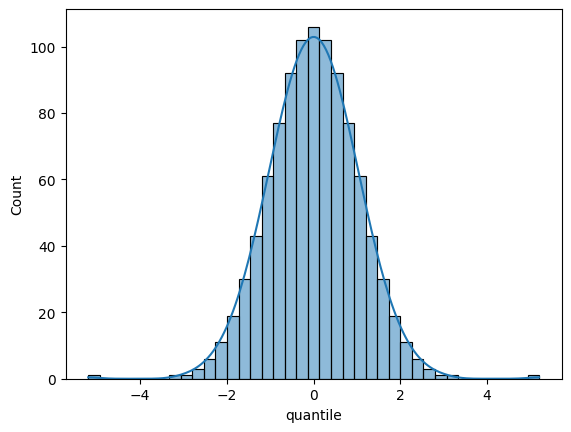

In [52]:
# create histogram for all columns using sns.hist and kde=true using for loop
for col in df.columns:
    sns.histplot(df[col],kde=True)
    plt.show()

# L1 & L2 Normalization

## L1 and L2 Normalization

L1 and L2 normalization are techniques used to regularize machine learning models by adding a penalty term to the loss function. They are commonly employed in linear models like logistic regression and linear regression to prevent overfitting and improve generalization performance.

1. **L1 Normalization (Lasso Regression)**:
   - L1 normalization, also known as Lasso regression, adds the sum of the absolute values of the coefficients to the loss function.
   - The L1 penalty term is represented as the \( L_1 \) norm of the coefficient vector: \( \lambda \sum_{i=1}^{n} |w_i| \), where \( \lambda \) is the regularization parameter and \( w_i \) are the model coefficients.
   - L1 regularization encourages sparsity in the coefficient vector by shrinking some coefficients to exactly zero, effectively performing feature selection.
   - L1 regularization is useful when there are many irrelevant or redundant features in the dataset.

2. **L2 Normalization (Ridge Regression)**:
   - L2 normalization, also known as Ridge regression, adds the sum of the squared values of the coefficients to the loss function.
   - The L2 penalty term is represented as the \( L_2 \) norm of the coefficient vector: \( \lambda \sum_{i=1}^{n} w_i^2 \), where \( \lambda \) is the regularization parameter and \( w_i \) are the model coefficients.
   - L2 regularization penalizes large coefficients and encourages them to be small but does not force them to exactly zero.
   - L2 regularization is effective for reducing the impact of multicollinearity (correlation between predictors) and stabilizing the model coefficients.

In summary, L1 normalization tends to yield sparse solutions with fewer nonzero coefficients, making it useful for feature selection, while L2 normalization shrinks the coefficients uniformly and is beneficial for reducing multicollinearity and stabilizing the model. The choice between L1 and L2 regularization depends on the specific characteristics of the dataset and the desired properties of the model. Often, a combination of both L1 and L2 regularization, known as Elastic Net regularization, is used to leverage the benefits of both techniques.


In [53]:
from sklearn.preprocessing import Normalizer
data=[[1,1,1],[1,1,0],[1,0,0]]
normalizer=Normalizer(norm='l2')
print(normalizer.fit_transform(data))

[[0.57735027 0.57735027 0.57735027]
 [0.70710678 0.70710678 0.        ]
 [1.         0.         0.        ]]


In [54]:
## L1
data=[[1,1,1],[1,1,0],[1,0,0]]
normalizer=Normalizer(norm='l2')
print(normalizer.fit_transform(data))

[[0.57735027 0.57735027 0.57735027]
 [0.70710678 0.70710678 0.        ]
 [1.         0.         0.        ]]


# Log Transformation

In [55]:
data={'values':[1,2,3,4,5,6,7,8,9,33,66,444,777]}
df=pd.DataFrame(data)

In [56]:
df['transformed']=np.log(df['values'])

In [57]:
df.head()

,values,transformed
0,1,0.000000
1,2,0.693147
2,3,1.098612
3,4,1.386294
4,5,1.609438


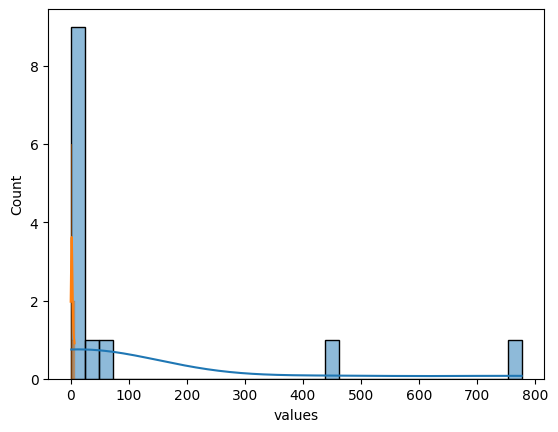

In [58]:
for col in df.columns:
    sns.histplot(df[col],kde=True)